<a href="https://colab.research.google.com/github/Sindhuhar/practice_computer_vision/blob/main/05_basic_image_processing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flipping

### Import Packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

### Function to display images in Google Colab

In [4]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()

### Implementing image flipping with OpenCV

In [5]:
from google.colab import files
uploaded = files.upload()

Saving giraffe.png to giraffe.png


In [6]:
!ls

giraffe.png  sample_data


In [7]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="giraffe.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values

args = {
    "image" : "giraffe.png"
}

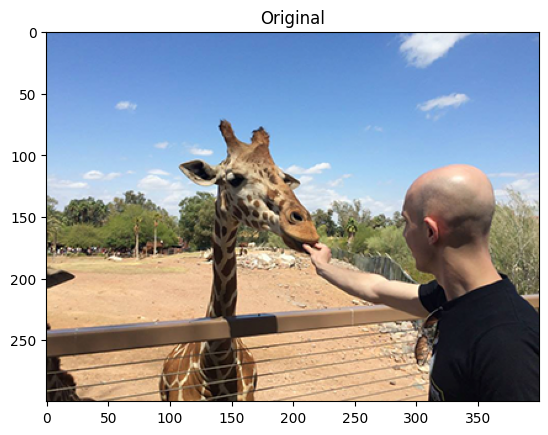

[INFO] flipping image horizontally


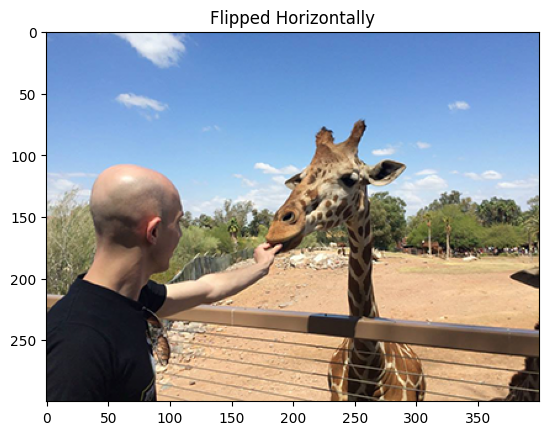

In [8]:
# load the original input image and display it to our screen

image = cv2.imread(args["image"])
plt_imshow("Original", image)

# flip the image horizontally
print("[INFO] flipping image horizontally")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

[INFO] flipping image vertically


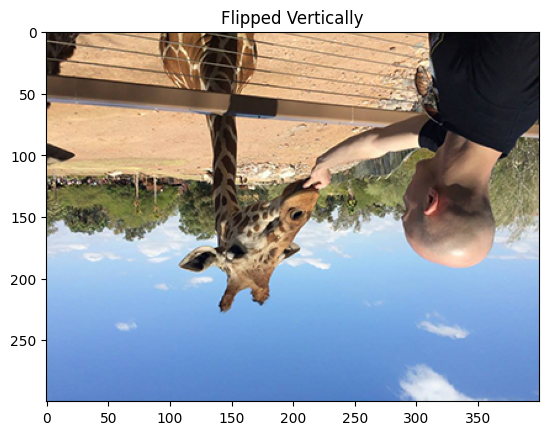

In [9]:
# flip the image vertically

flipped = cv2.flip(image,0)
print("[INFO] flipping image vertically")
plt_imshow("Flipped Vertically", flipped)

[INFO] Flipping image horizontally and Vertically


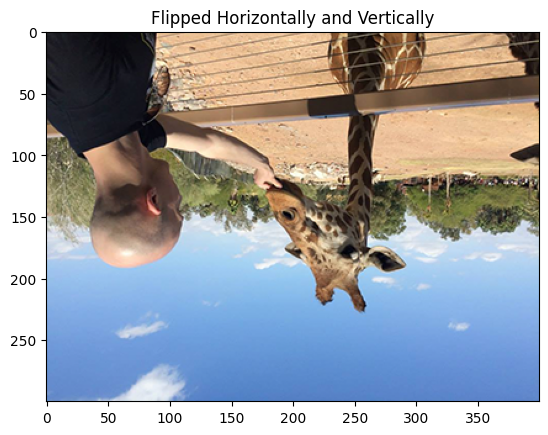

In [10]:
# flip the image along both axes

flipped = cv2.flip(image, -1)
print("[INFO] Flipping image horizontally and Vertically")
plt_imshow("Flipped Horizontally and Vertically", flipped)

#Cropping

Cropping is the art of selecting and extracting the region of interest (ROI)

### Function to display images in Google Colab

In [11]:
def plt_imshow(title,image):
  # convert the image frame BGR to RGB color space and display it
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()

### Understanding image cropping with OpenCV and NumPy array slicing

In [12]:
I = np.arange(0,25)
I

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [13]:
I = I.reshape((5,5))
I

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [14]:
I[0:3, 0:2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

In [15]:
I[3:5, 1:5]

array([[16, 17, 18, 19],
       [21, 22, 23, 24]])

### Implementing image cropping with OpenCV

In [16]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="giraffe.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "giraffe.png"
}

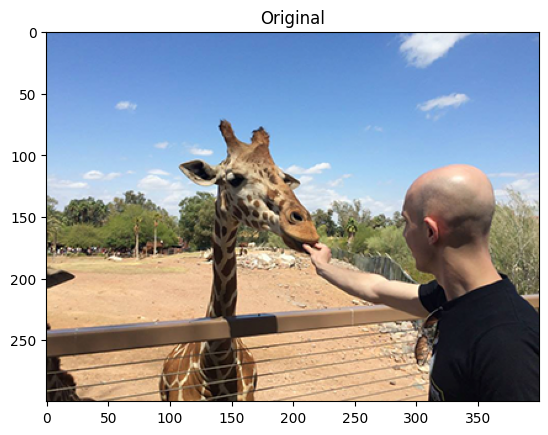

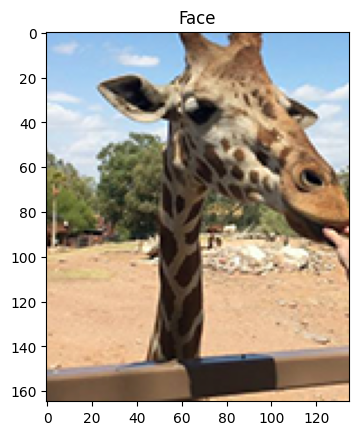

In [17]:
# load the input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# cropping an image with OpenCV is accomplished via simple NumPy
# array slices in startY:endY, startX:endX order -- here we are
# cropping the face from the image (these coordinates were
# determined using photo editing software such as Photoshop,
# GIMP, Paint, etc.)
face = image[85:250, 85:220]
plt_imshow("Face", face)

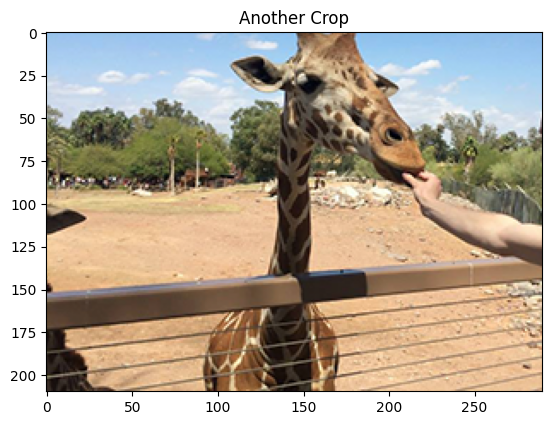

In [18]:
# apply another image crop
another_crop = image[90:450, 0:290]
plt_imshow("Another Crop", another_crop)

#Image Arithmetic OpenCV

### Function to display images in Google Colab

In [19]:
def plt_imshow(title,image):
  # convert the image frame BGR to RGB color space and display it
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()

### Implementing image arithmetic with OpenCV

In [20]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="giraffe.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "giraffe.png"
}

In [21]:
# images are NumPy arrays stored as unsigned 8-bit integers (unit8)
# with values in the range [0, 255]; when using the add/subtract
# functions in OpenCV, these values will be *clipped* to this range,
# even if they fall outside the range [0, 255] after applying the
# operation

added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [22]:
# using NumPy arithmetic operations (rather than OpenCV operations)
# will result in a modulo ("wrap around") instead of being clipped
# to the range [0, 255]

added = np.uint([200]) + np.uint([100])
subtracted = np.uint([50]) +np.uint([100])
print("wrap around: {}". format(added))
print("wrap around: {}". format(subtracted))


wrap around: [300]
wrap around: [150]


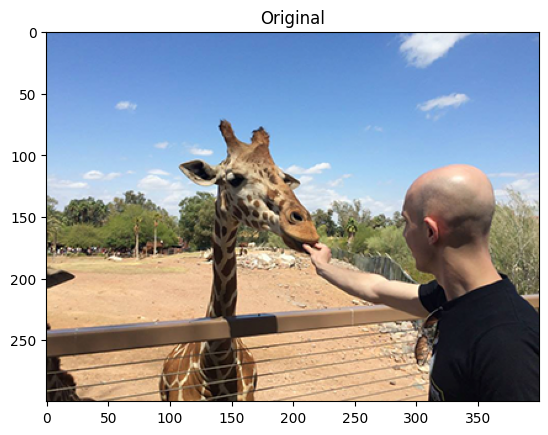

In [23]:
# load the original input image and display it to our screen

image = cv2.imread(args["image"])
plt_imshow("Original", image)

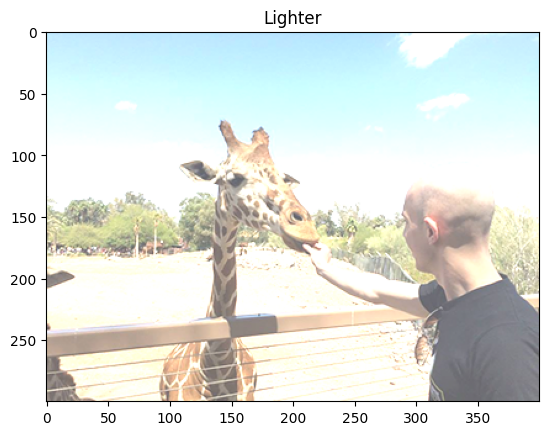

In [24]:
# increasing the pixel intensities in our input image by 100 is
# accomplished by constructing a NumPy array that has the *same
# dimensions* as our input image, filling it with ones, multiplying
# it by 100, and then adding the input image and matrix together

M = np.ones(image.shape, dtype = "uint8")*100
added = cv2.add(image,M)
plt_imshow("Lighter", added)

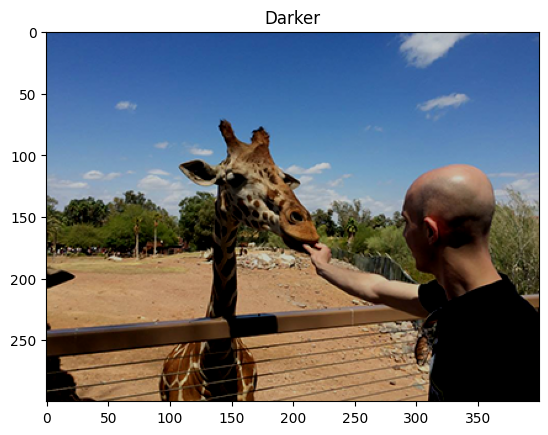

In [25]:
# similarly, we can subtract 50 from all pixels in our image and make it
# darker

M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image,M)
plt_imshow("Darker", subtracted)

#OpenCV Bitwise AND, OR, XOR, and NOT

### Implementing OpenCV AND, OR, XOR, and NOT bitwise operators

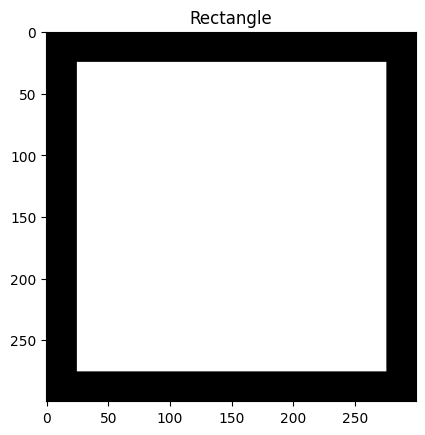

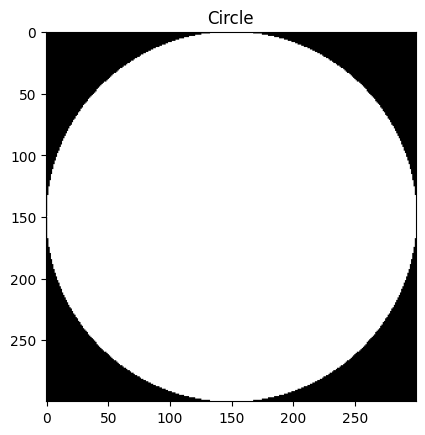

In [26]:
# draw a rectangle

rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25,25), (275,275), 255, -1)
plt_imshow("Rectangle",rectangle)

# draw a circle

circle = np.zeros((300,300), dtype = "uint8")
cv2.circle(circle, (150,150), 150, 255, -1)
plt_imshow("Circle", circle)

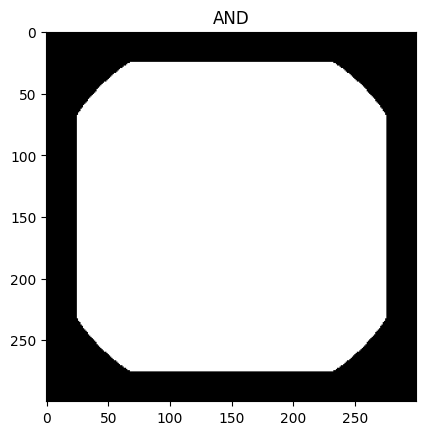

In [27]:
# a bitwise 'AND' is only 'True' when both inputs have a value that
# is "ON' -- in this case, the cv2.bitwise_and function examines
# every pixel in the rectangle and circle; if *BOTH* pixels have a
# value greater than zero then the pixel is turned 'ON (i.e., 255)
# in the output image; otherwise, the output value is set to
# 'OFF' (i.e., 0)

bitwiseAnd = cv2.bitwise_and(rectangle, circle)
plt_imshow("AND", bitwiseAnd)

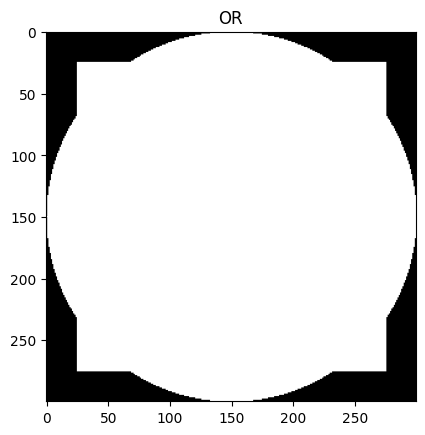

In [28]:
# a bitwise 'OR' examines every pixel in the two inputs, and if
# *EITHER* pixel in the rectangle or circle is greater than zero,
# then the output pixel has a value of 255, otherwise it is 0

bitwiseOr = cv2.bitwise_or(rectangle, circle)
plt_imshow("OR", bitwiseOr)

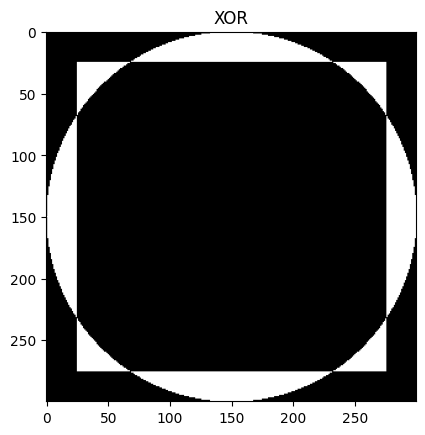

In [29]:
# the bitwise 'XOR' is identical to the 'OR' function, with one
# exception: both the rectangle and circle are not allowed to *BOTH*
# have values greater than 0 (only one can be 0)

bitwiseXor = cv2.bitwise_xor(rectangle, circle)
plt_imshow("XOR", bitwiseXor)

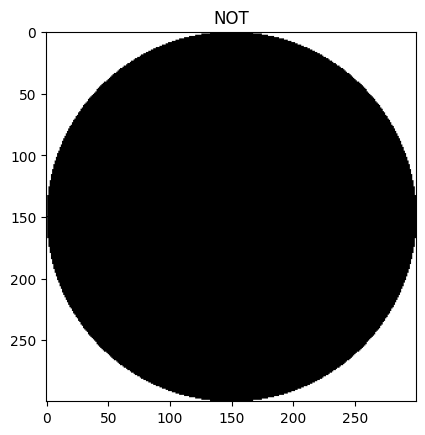

In [30]:
# finally, the bitwise 'NOT' inverts the values of the pixels; pixels
# with a value of 255 become 0, and pixels with a value of 0 become
# 255

#bitwiseNot = cv2.bitwise_not(circle)
 #plt_imshow("NOT", bitwiseNot)

bitwiseNot = cv2.bitwise_not(circle)
plt_imshow("NOT", bitwiseNot)


# Image Masking with OpenCV

In [31]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="grand_canyon.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values

args = {
    "image" : "giraffe.png"
}

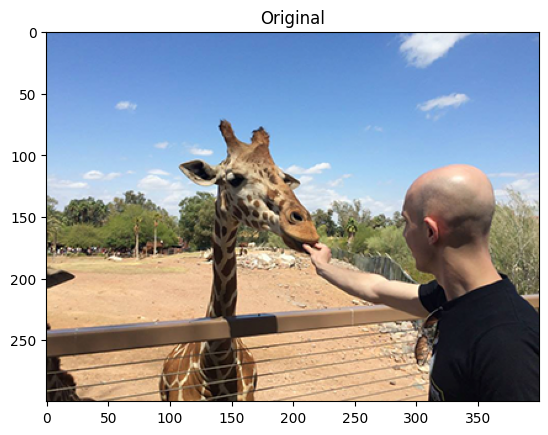

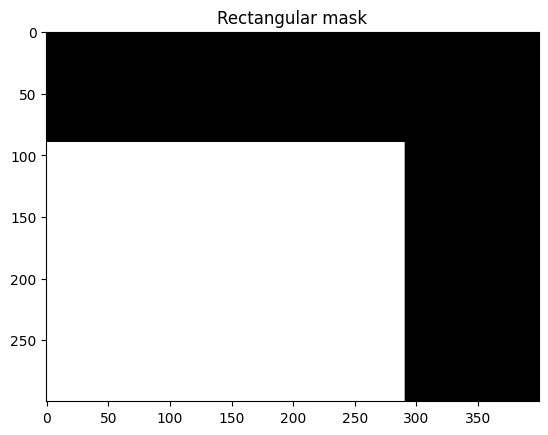

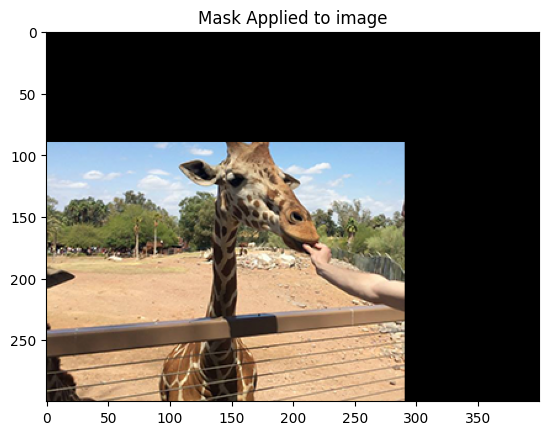

In [34]:
# load the original input image and display it to our screen

image = cv2.imread(args["image"])
plt_imshow("Original", image)

# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept

mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (0,90), (290,450), 255, -1)
plt_imshow("Rectangular mask", mask)

# apply our mask -- notice how only some portion in the image is
# cropped out

masked = cv2.bitwise_and(image, image, mask = mask)
plt_imshow("Mask Applied to image", masked)

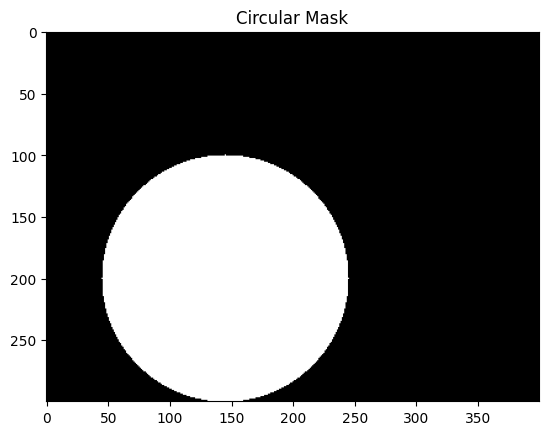

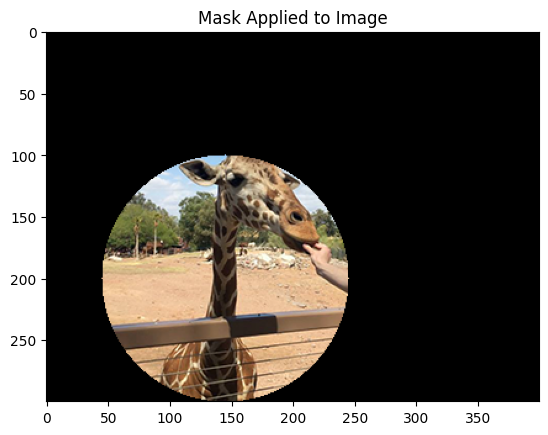

In [35]:
# now, let's make a circular mask with a radius of 100 pixels and
# apply the mask again

mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (145,200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

# Splitting and Merging Channels with OpenCV

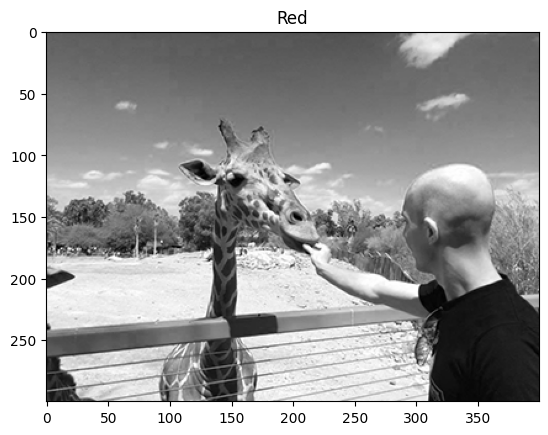

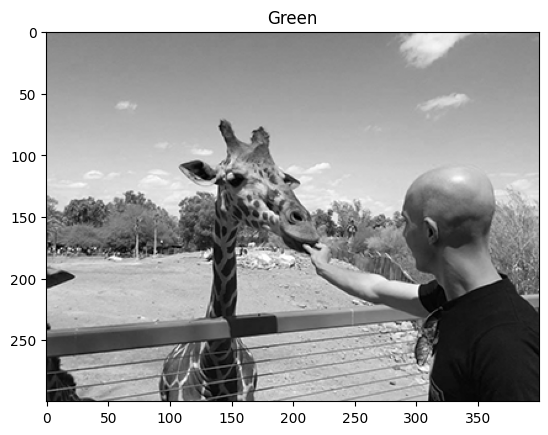

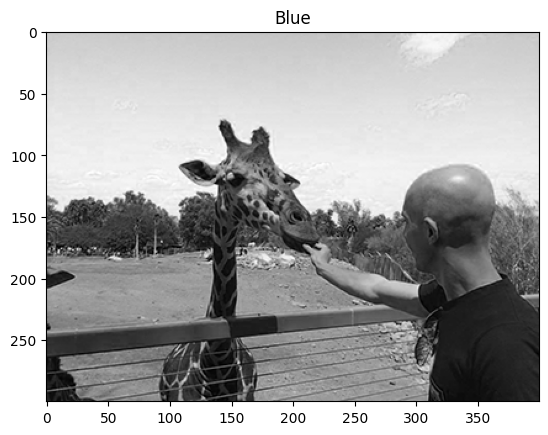

In [36]:
# load the input image and grab each channel -- note how OpenCV
# represents images as NumPy arrays with channels in Blue, Green,
# Red ordering rather than Red, Green Blue

image = cv2.imread(args["image"])
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

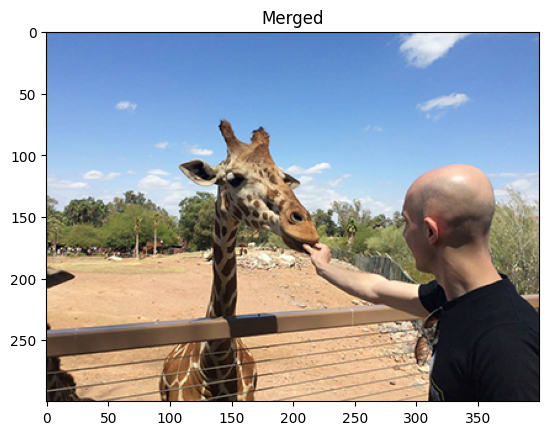

In [37]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

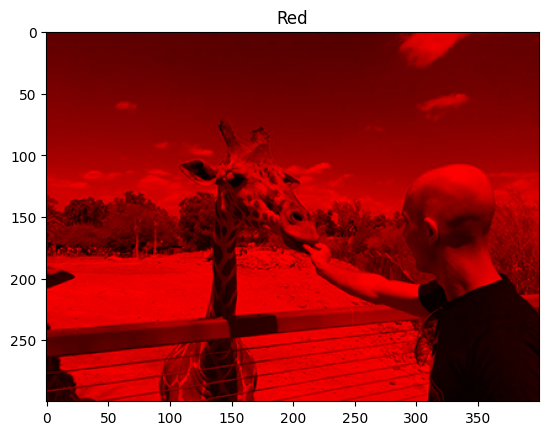

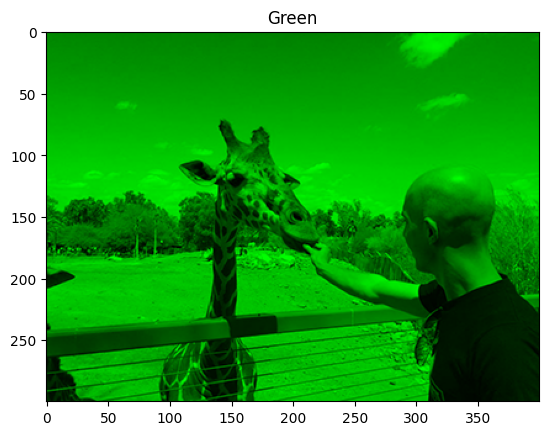

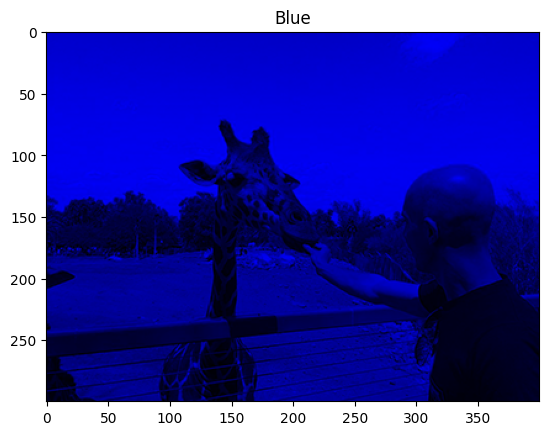

In [39]:
# visualize each channel in color

zeros = np.zeros(image.shape[:2], dtype = "uint8")
plt_imshow("Red",cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))